In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

In [2]:
df1= pd.read_csv('titanic_train.csv')
df2= pd.read_csv('titanic_test.csv')

In [3]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df=pd.concat([df1,df2],axis=0,ignore_index =True)

In [5]:
df = df[[col for col in df.columns if col!='Survived']+['Survived']]

In [6]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN


In [7]:
df.shape


(1309, 12)

In [8]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
Survived       0.319328
dtype: float64

In [9]:
df ['Age']= df['Age'].fillna(df['Age'].median())

In [10]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [12]:
df =pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [13]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Sex_male,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,False,False,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,False,False,True
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,True,False,True


In [14]:
df.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True)

In [15]:
df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Sex_male', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [16]:
train_df= df[df['Survived'].notna()].copy()

In [17]:
train_df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,True,False,True
1,1,38.0,1,0,71.2833,1.0,False,False,False
2,3,26.0,0,0,7.9250,1.0,False,False,True
3,1,35.0,1,0,53.1000,1.0,False,False,True
4,3,35.0,0,0,8.0500,0.0,True,False,True


In [18]:
test_df= df[df['Survived'].isna()].copy()

In [19]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
891,3,34.5,0,0,7.8292,NaN,True,True,False
892,3,47.0,1,0,7.0000,NaN,False,False,True
893,2,62.0,0,0,9.6875,NaN,True,True,False
894,3,27.0,0,0,8.6625,NaN,True,False,True
895,3,22.0,1,1,12.2875,NaN,False,False,True


In [20]:
x= train_df.drop(columns=['Survived'])
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [21]:
y=train_df['Survived'].astype(int)
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [22]:
x_test_final= test_df.drop(columns=['Survived'])
x_test_final.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
891,3,34.5,0,0,7.8292,True,True,False
892,3,47.0,1,0,7.0000,False,False,True
893,2,62.0,0,0,9.6875,True,True,False
894,3,27.0,0,0,8.6625,True,False,True
895,3,22.0,1,1,12.2875,False,False,True


In [23]:
#Scaling Features 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)
x_test_scaled = scaler.fit_transform(x_test_final)


In [24]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [25]:
#SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE 
smote= SMOTE(random_state=42)
x_resampled,y_resampled = smote.fit_resample(x_scaled,y)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_resampled,y_resampled,test_size=0.2, random_state=42)


**TRAIN LOGISTIC REGRESSION**

In [27]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, classification_report
y_pred= model.predict(x_test)
print("validation accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
      

validation accuracy: 0.8090909090909091
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       103
           1       0.80      0.85      0.83       117

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



In [29]:
import joblib 
joblib.dump(model, 'titanic_logistic_model_smote.pkl')
joblib.dump(scaler,'titanic_scaler_smote.pkl')

['titanic_scaler_smote.pkl']

In [30]:
model= joblib.load('titanic_logistic_model_smote.pkl')
model= joblib.load('titanic_scaler_smote.pkl')

## SOME QUESTIONS TO BE ANSWERED ##

In [31]:
#give the number of survived 
df.value_counts(df['Survived'])


Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [32]:
#what was overall survival rate ?


sns.countplot(x='Survived',data=train_df)
plt.xticks([0,1],['Not Survived','Survived'])

([<matplotlib.axis.XTick at 0x1a37d91ff20>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

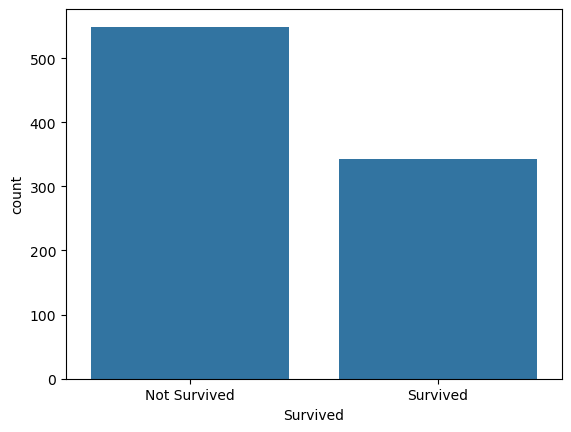

In [33]:
plt.show()

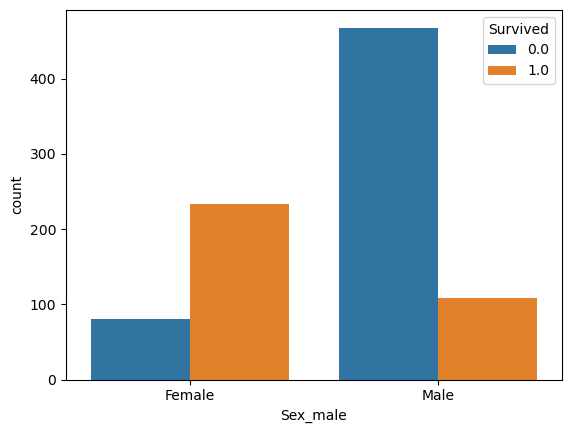

In [34]:
#did gender influence survival rate ?

sns.countplot(x='Sex_male',hue='Survived',data= train_df)
plt.xticks([0,1],['Female','Male'])
plt.show()

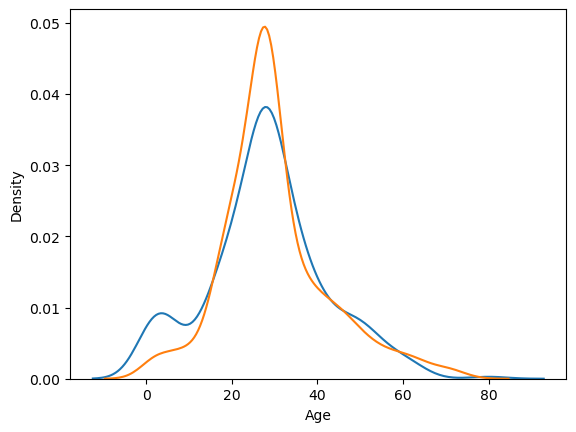

In [35]:
#give the age wise plot of who survived 

sns.kdeplot(train_df[train_df['Survived']==1]['Age'],label='Survived')
sns.kdeplot(train_df[train_df['Survived']==0]['Age'],label='not survived')
plt.show()